<a href="https://colab.research.google.com/github/kuanhoong/tidyverse/blob/main/tidyverse_in_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tidyverse

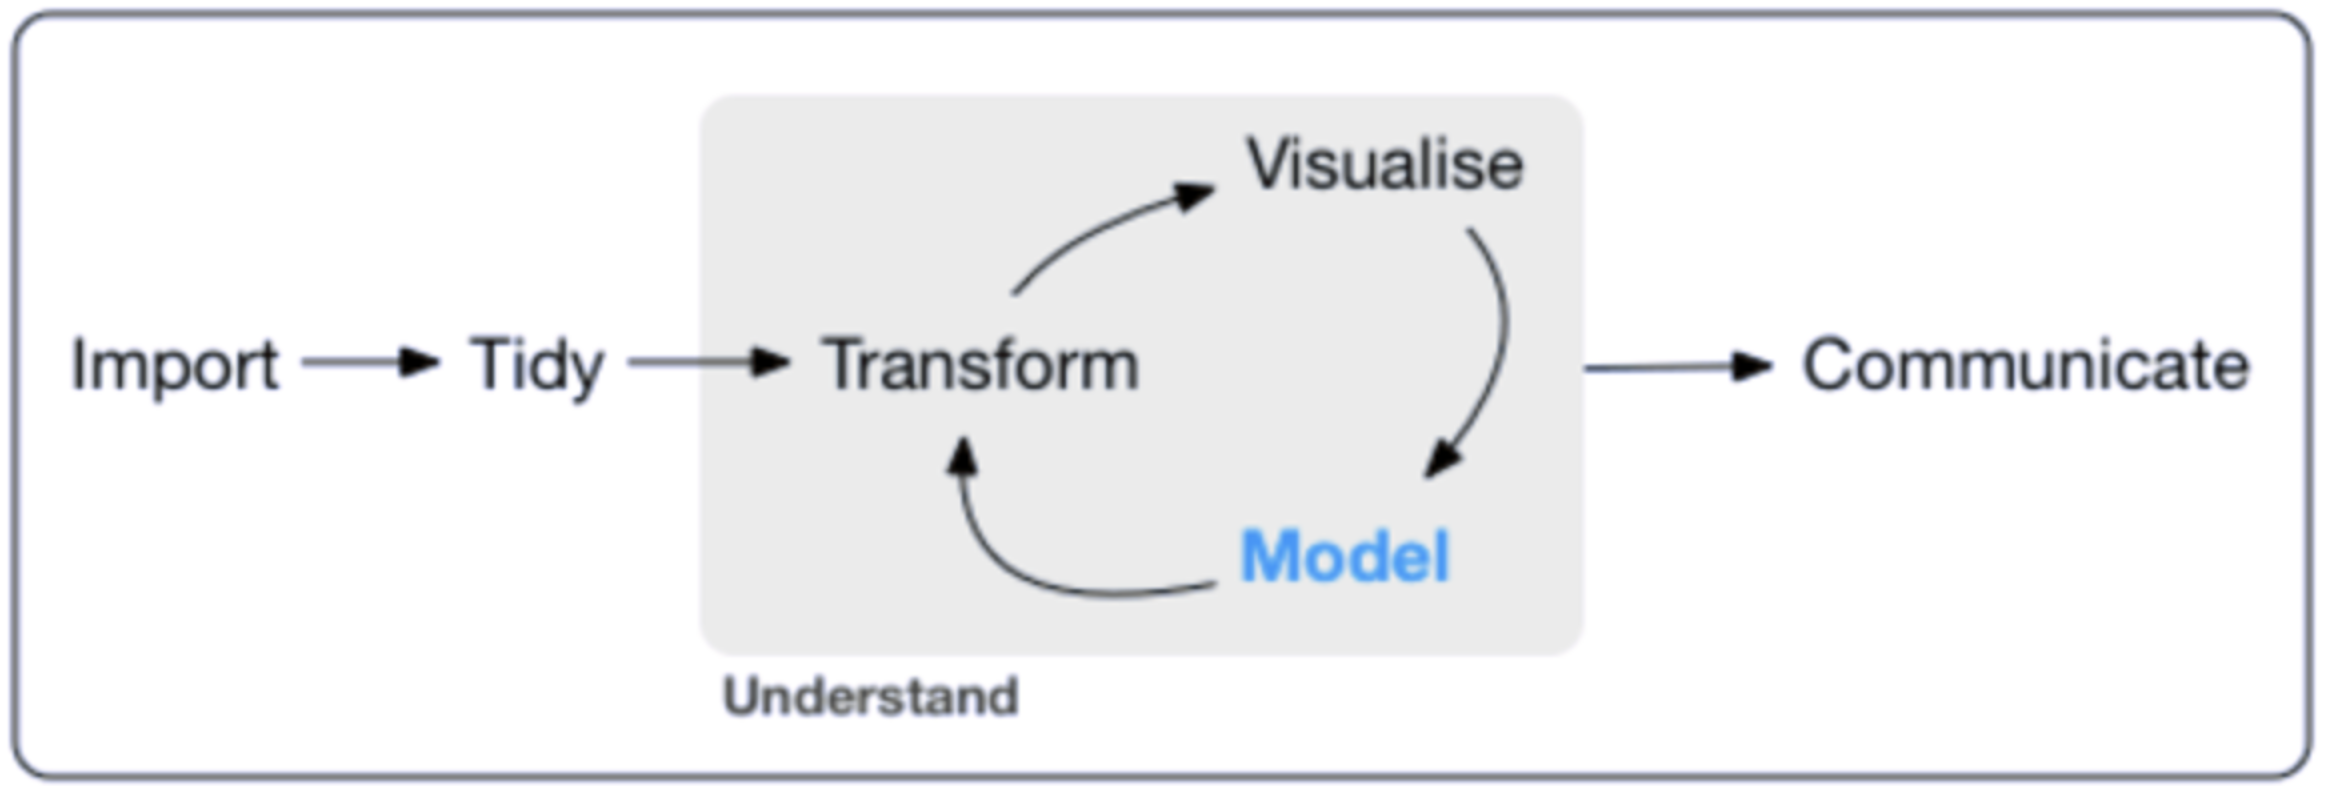

[tidyverse](https://www.tidyverse.org) in R, one of the Important packages in R, there are a lot of new techniques available maybe users are not aware of.

In this live code-along session, you'll learn the basic principles of analyzing your data using R and the tidyverse. You'll code along to explore the `nycflights13` dataset and discover how you can use packages (i.e. sets of tools for doing stuff with data) in the tidyverse to get from data to insight as intuitively and efficiently as possible. But seriously: if you want to filter your data, you use the verb (or function) `filter`; if you wish to arrange it in a particular order, you use `arrange`. The tidyverse set of tools is a revolution that consists of computational tools t
hat intuitively mirror how we all think about data.

In this session, we will use Kaggle Notebook and Tidyverse to explore the [`NYC Flights 2013`](https://cran.r-project.org/web/packages/nycflights13/) dataset, which consists of observations of all flights that departed NYC in 2013. The data frame contains all 336,776 flights and the data comes from the US Bureau of Transportation Statistics, and is documented in `?flights`.

# dplyr package
There are five key `dplyr` functions that allow you to solve the vast majority of your data manipulation challenges:

- Pick observations by their values (`filter()`).
- Reorder the rows (`arrange()`).
- Pick variables by their names (`select()`).
- Create new variables with functions of existing variables (`mutate()`).
- Collapse many values down to a single summary (`summarise()`).

These can all be used in conjunction with `group_by()` which changes the scope of each function from operating on the entire dataset to operating on it group-by-group. These six functions provide the verbs for a language of data manipulation.



## Installation

- Install [R](https://cran.r-project.org/mirrors.html) from here.
- Install [RStudio](https://www.rstudio.com/products/rstudio/download/) from here.
- Follow kuanhoong's github repo [here](https://github.com/kuanhoong/tidyverse) to test your set-up (note: it is not necessary to establish communication between Kaggle and Github for this session).
- Install all the packages in the tidyverse by running `install.packages("tidyverse")` in Kaggle/Google Colab notebook.

In [ ]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("nycflights13")
library(tidyverse)
library(lubridate)
library(nycflights13)

## Getting Data
Based on `nycflights13` data, just load the data into R environment.

In [ ]:
head(flights)

In [ ]:
summary(flights)

## pipes

Use `%>%` to emphasise a sequence of actions, rather than the object that the actions are being performed on. Learn more about [best practices](https://style.tidyverse.org/pipes.html) of using pipes.

In [ ]:
flights %>%
summary()

you can concatenate pipes

In [ ]:
flights %>%
  drop_na() %>%
  summary()

# Wrangle your data

Now it's time to explore your data and get some initial insight into the dataset. You'll be using dplyr verbs such as `filter()`, `arrange()` and `mutate()`, which do exactly what they say.

## `filter()`

The `filter` verb chooses only the observations that match the condition.

In [ ]:
flights %>%
  filter(origin == "JFK")

In [ ]:
## filter origin == JFK and dest == "LAX"

flights %>%
filter (origin == "JFK" & dest == "LAX")

# Exercise 1

Filter all flights flying out from `LGA` on Valentine's day

In [ ]:
#your code here

## `arrange()`

Use `arrange()` to sort your observations 

In [ ]:
## arrange by air_time

flights %>%
arrange(air_time)

In [ ]:
## arrange by air_time in decreasing manner

flights %>%
arrange(desc(air_time))

## `select()`

`select()` allows you to rapidly zoom in on a useful subset using operations based on the names of the variables.

In [ ]:
# Select columns by name
select(flights, year, month, day)

There are a number of helper functions you can use within `select()`:

- `starts_with("abc")`: matches names that begin with “abc”.

- `ends_with("xyz")`: matches names that end with “xyz”.

- `contains("ijk")`: matches names that contain “ijk”.

In [ ]:
arrival_flights <- flights %>%
                    select(starts_with("arr"))
arrival_flights

In [ ]:
# rename()

arrival_flights %>%
rename(arrival_time = arr_time, arrival_delay = arr_delay)

In [ ]:
# rename_with()

arrival_flights %>%
rename_with(toupper)

# Exercise 2

Find flight that left the earliest. Show the tailnum.

In [ ]:
#your code here

## `mutate()`

Use `mutate()` to make a new variable.

In [ ]:
# Create new column flight_time_min = total hour * 60 + minute
flights %>%
  mutate(flight_time_min = hour*60 + minute)

In [ ]:
# Create new column flight_time_min = total hour * 60 + minute and sort desc
flights %>%
mutate(flight_time_min = hour*60 + minute) %>%
arrange(desc(flight_time_min))

# Exercise 3

Select 4 columns:
- dep_delay
- arr_delay
- distance
- air_time
and save as `new_flights`

create two new variables:
1. gain_time = dep_delay - arr_delay
2. speed = distance / air_time * 60


In [ ]:
#your code here

## Summarizing and grouping your data

Use the `summarise()` verb to group and summarise data.

In [ ]:
# Check out mean air_time

flights %>%
summarise(mean_air_time = mean (air_time, na.rm=TRUE), n=n())



You can also use the `filter()` and `summarise()` verbs to find out the mean `air_time` for flights from `JFK` to `LAX`

In [ ]:
flights %>%
filter (origin == "JFK" & dest == "LAX") %>%
summarise (mean_air_time = mean(air_time, na.rm = TRUE))

## `group_by()`
`summarise()` is not terribly useful unless we pair it with `group_by()`

Use the `group_by()` and `summarise()` verbs to find the mean `air_time` and `tailnum` as a function for all flights from `JFK` to `LAX`

In [ ]:
#summarise() and group_by()

flights %>%
filter (origin == "JFK" & dest == "LAX") %>%
group_by (tailnum) %>%
summarise (mean_air_time = mean(air_time, na.rm = TRUE), n=n())

In [ ]:
#use group_by() and ungroup() without summarise()

flights %>%
drop_na() %>%
group_by(dest, origin) %>%
mutate(
    air_time_mean = mean(air_time),
    air_time_sd = sd(air_time),
    n = n()
  ) %>%
  ungroup() %>%
filter(origin=='EWR' & dest=='IAH') %>%
head()

## `count()`

Whenever you do any aggregation, it’s always a good idea to include either a `count (n())`, or a count of non-missing values (`sum(!is.na(x))`). 

In [ ]:
flights %>% 
  group_by(dest) %>% 
  summarise(
    count = n(),
    dist = mean(distance, na.rm = TRUE),
    delay = mean(arr_delay, na.rm = TRUE)
 )

# Exercise 4

Create a new variable called`long_flight` where air_time is greater or equal 360. Count number of `long_flight`

In [ ]:
#your code here

## Create a new column basis count option

In [ ]:
flights %>%
  mutate(long_flight = (air_time >= 6 * 60)) %>%
  View()

Now need to count the number of long flights

In [ ]:
flights %>%
  mutate(long_flight = (air_time >= 6 * 60)) %>%
  count(long_flight)

The above two steps you can execute in a single line.

In [ ]:
flights %>%
  count(long_flight = air_time >= 6 * 60)

# Exercise 5

In the original data set year, month and date contained as separate columns-based, use the `make_date` command to create new `date` column by combining `year`, `month` and `date`.

In [ ]:
#your code here

# Plot

You may combine all functions and produce a plot with `ggplot2`

To plot your data using `ggplot2`, you specify three things:

1. Your data
2. Your aesthetics (for example, what's on the x-axis)
3. Your layers (for example, barplot, scatterplot)

In [ ]:
# Scatter plot of arr_delay vs dep_delay
ggplot(flights, aes(x = arr_delay, y = dep_delay)) +
  geom_point()

In [ ]:
# Scatter plot of arr_delay vs dep_delay, drop na, filter by 'JFK' and 'LGA' and carrier
ggplot(flights %>% 
        drop_na() %>%  
        filter(origin %in% c('LGA','JFK')),
        aes(x = arr_delay, y = dep_delay, color=carrier)) +
geom_point()

In [ ]:
## bar plot

ggplot(data=flights, mapping = aes(x = carrier)) +
  geom_bar()

# Exercise 6

Extract carriers that has more than 10000 rows of data and store as a new data frame called `top_carriers`

In [ ]:
#your code here


#  Exercise 7

Download the gapminder data

```
gapminder_orig <- read.csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")
# define a copy of the original dataset that we will clean and play with 
gapminder <- gapminder_orig
```
Filter countries "Thailand", "America" and "Australia" in 2006 and then select and show the `country` and `life expectancy` variables.


In [ ]:
gapminder_orig <- read.csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")
# define a copy of the original dataset that we will clean and play with 
gapminder <- gapminder_orig
head(gapminder)

In [ ]:
#your code here


# Exercise 8

Create new variable, `gdp`, from the gapminder data frame. `gdp` is equal to `gdpPercap` multiplied by `pop`. Show `Country` with the lowest`gdp`.

In [ ]:
#your code here



# Exercise 9

Compute the mean life expectancy and total `gdp` for each year.

In [ ]:
#your code here


# Exercise 10

Plot scatterplot where `x=gdpPercap`, `y=lifeExp` and `colour=continent` for year 2007.

In [ ]:
#your code here


# Tidy Data

There’s a popular saying in Data Science that goes like this — *“Data Scientists spend up to 80% of the time on data cleaning and 20 percent of their time on actual data analysis”.* 

## The 3 rules of Tidy Data
1. Each variable is a column
2. Each observation is a row
3. Each type of observational unit is a table

## 5 symptoms of messy data
1. Column headers are values, not variable names.
2. Multiple variables are stored in one column.
3. Variables are stored in both rows and columns.
4. Multiple types of observational units are stored in the same table.
5. A single observational unit is stored in multiple tables.

`tidyr` — set of functions to help you get tidy data. It’s the successor to reshape2(which uses melt and cast). It has 5 main categories

- Pivoting → `pivot_longer()`& `pivot_wider()`
- Rectangling → `unnest_longer()`, `unnest_wider()`, `hoist()`
- Nesting → `nest()` & `unnest()`
- Splitting and combining columns →`separate()`,`extract()`, `unite()`
- Missing Values→ `complete()`, `drop_na()`, `fill()`, `replace_na()`

In [ ]:
dem_score <- read_csv("https://raw.githubusercontent.com/kuanhoong/tidyverse/main/data/dem_score.csv")
dem_score

Convert a data frame that isn’t in “tidy” format (“wide” format) to a data frame that is in “tidy” format (“long/narrow” format).

To go from wide to long with tidyr, use the `pivot_longer()` function. It has the following syntax:

```r
pivot_longer(mydata, 
  cols, # columns that should pivot from wide to long (unquoted)
  names_to, # name of the new category column as a quoted string
  values_to # name of the new value column as a quoted string
)
```

In [ ]:
# convert to tidy format ("wide" format)
dem_tidy <- dem_score %>% 
  pivot_longer(names_to = "year", 
               values_to = "democracy_score", 
               cols = -country,
               names_transform = list(year = as.integer)) 
dem_tidy

We set the arguments to `pivot_longer()` as follows:

1. `names_to` is the name of the variable in the new “tidy” data frame that will contain the column names of the original data. Observe how we set `names_to = "year"`. In the resulting guat_dem_tidy, the column `year` contains the years where `country`'s democracy scores were measured.
2. `values_to` is the name of the variable in the new “tidy” data frame that will contain the values of the original data. Observe how we set `values_to` = `democracy_score`. In the resulting `dem_tidy` the column democracy_score contains the `democracy scores` as numeric values.
3. The third argument is the columns you either want to or don’t want to “tidy.” Observe how we set this to `cols = -country` indicating that we don’t want to “tidy” the country variable in dem_tidy.
4. The last argument of `names_transform` tells R what type of variable `year` should be set to. Without specifying that it is an `integer` as we’ve done here, `pivot_longer()` will set it to be a character value by default.

In [ ]:
## ggplot plot for China
ggplot(dem_tidy %>%
       filter(country=="China"),
       aes(x = year, y = democracy_score)) +
  geom_line() +
  labs(x = "Year", y = "Democracy Score")

To reshape the other way, use `pivot_wider()`:

```r
pivot_wider(mydata, 
  id_cols, # optional vector of columns you do not want affected
  names_from, # category column(s) to pivot from long to wide
  values_from # value columns(s) that hold data for each category column
  names_sep # optional string separator for category-value columns
)
```

In [ ]:
# us_rent_income: US state for median annual income, median monthly rent and margins of error
us_rent_income

In [ ]:
rent_income_wide <- pivot_wider(us_rent_income,
             # id_cols = optional vector of unaffected columns,
             names_from = c(variable),
             values_from = c(estimate, moe),
             names_sep = "_"         
)
rent_income_wide

# Conclusion

In this tutorial, you have gone from zero to one with the basics of data analysis using the tidyverse and tidy tools. You've learnt how to `select()`, `filter()` your data, `arrange()` and `mutate()` it, plot and `summarise()` it using `dplyr` and `ggplot2`, all by writing code that mirrors the way you think and talk about data.

# Resources

- [Tidyverse](https://www.tidyverse.org/) - R Packages for Data Science
- [R for Data Science](https://r4ds.had.co.nz/) - Hadley Wickham & Garrett Grolemund
- [Getting Started with the Tidyverse: Tutorial](https://www.datacamp.com/tutorial/tidyverse-tutorial-r)
- [Manipulating, analyzing and exporting data with tidyverse](https://datacarpentry.org/R-ecology-lesson/03-dplyr.html)
- [Intoduction to Tidyverse](https://www.pkimes.com/PR2019replicathon/tutorials/0b_R_tidyverse.html)
- [Data transformation with dplyr cheatsheet](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf)

# About Me

## Poo Kuan Hoong, Ph.D
Connect with me:
- [Twitter](https://twitter.com/kuanhoong)
- [LinkedIn](https://www.linkedin.com/in/kuanhoong/)
- [GitHub](https://github.com/kuanhoong/)